In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv("Shipments_Data.csv")

In [ ]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,79015,D,Ship,5,2,251.150258,7,High,Male,39.284352,2721.316876,1
1,53528,C,Ship,3,3,263.566862,4,Low,Female,4.383131,5257.472937,1
2,23645,D,Road,5,1,268.170682,4,Low,Male,-0.166985,5604.990053,0
3,5867,C,Road,4,4,206.000000,2,high,M,8.000000,4093.000000,1
4,63510,C,Ship,5,2,286.831464,4,Low,Male,3.436376,4840.759196,1
...,...,...,...,...,...,...,...,...,...,...,...,...
100293,6266,F,Ship,4,4,217.000000,6,medium,M,9.000000,1974.000000,0
100294,54887,A,Road,4,5,256.923412,2,High,Male,4.247881,5077.045534,0
100295,76821,E,Air,2,2,164.910647,3,Medium,Female,8.843456,4133.926777,1
100296,861,A,Ship,5,3,144.000000,6,medium,F,35.000000,1009.000000,1


In [ ]:
display(data.head())
print("Missing Values:\n", data.isnull().sum())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,79015,D,Ship,5,2,251.150258,7,High,Male,39.284352,2721.316876,1
1,53528,C,Ship,3,3,263.566862,4,Low,Female,4.383131,5257.472937,1
2,23645,D,Road,5,1,268.170682,4,Low,Male,-0.166985,5604.990053,0
3,5867,C,Road,4,4,206.000000,2,high,M,8.000000,4093.000000,1
4,63510,C,Ship,5,2,286.831464,4,Low,Male,3.436376,4840.759196,1


Missing Values:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


<ipython-input-15-415177c77978>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=data, palette='coolwarm')


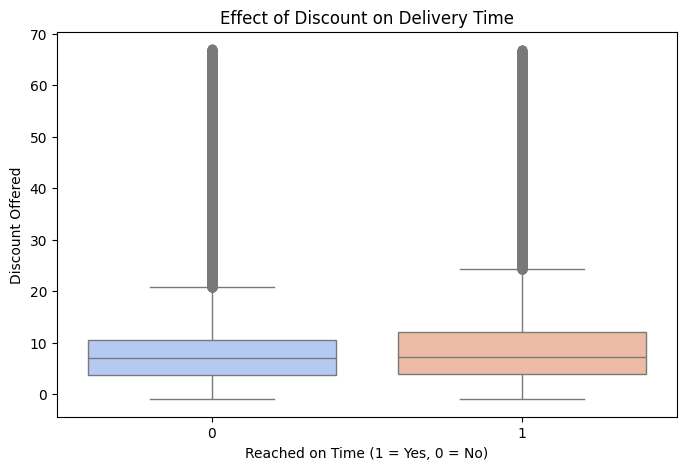

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=data, palette='coolwarm')
plt.title("Effect of Discount on Delivery Time")
plt.xlabel("Reached on Time (1 = Yes, 0 = No)")
plt.ylabel("Discount Offered")
plt.show()

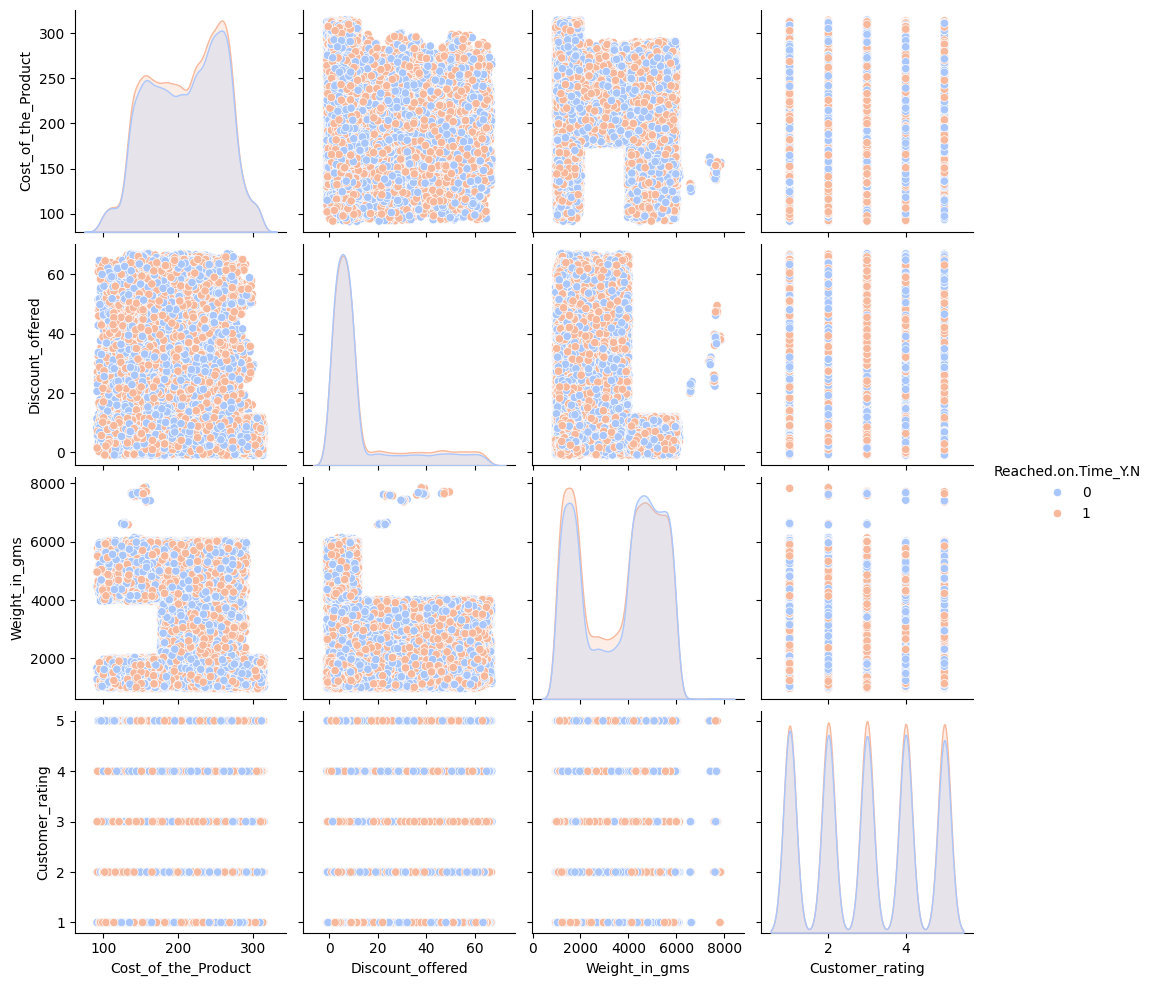

In [ ]:
sns.pairplot(data[['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms', 'Customer_rating', 'Reached.on.Time_Y.N']], hue='Reached.on.Time_Y.N', palette='coolwarm')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Apply One-Hot Encoding to all categorical columns
X = pd.get_dummies(data.drop('Reached.on.Time_Y.N', axis=1), drop_first=True)
y = data['Reached.on.Time_Y.N']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50      9815
           1       0.53      0.53      0.53     10245

    accuracy                           0.52     20060
   macro avg       0.52      0.52      0.52     20060
weighted avg       0.52      0.52      0.52     20060

Accuracy Score: 0.5154037886340977


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
data = pd.read_csv("Shipments_Data.csv")
X = data.drop(columns=['Reached.on.Time_Y.N'])
y = data['Reached.on.Time_Y.N']
label_encoder = LabelEncoder()
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])
if y.dtype == "object":
    y = label_encoder.fit_transform(y)
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
feature_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
print("\n Feature Scores:\n", feature_scores)
selected_features = X.columns[selector.get_support()]
print("\n Selected Features:", selected_features.tolist())


 Feature Scores:
 Product_importance     256.326155
Discount_offered       173.247271
ID                     109.433213
Weight_in_gms           83.226881
Mode_of_Shipment        28.053654
Gender                  25.765690
Warehouse_block          9.831513
Customer_care_calls      7.908907
Customer_rating          5.063378
Cost_of_the_Product      0.691676
Prior_purchases          0.590109
dtype: float64

 Selected Features: ['ID', 'Mode_of_Shipment', 'Product_importance', 'Discount_offered', 'Weight_in_gms']
